In [1]:
from imutils import paths
import face_recognition
import pickle
import os
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt

In [4]:
images = list(paths.list_images('Friends/Train'))
known_encoding = {}
for image_path in tqdm(images):
    name = image_path.split(os.path.sep)[-1].split()[0]
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    face = face_recognition.face_locations(img_rgb, model="hog")
    encodings = face_recognition.face_encodings(img_rgb, face)
    for encoding in encodings:
        if name not in known_encoding.keys():
            known_encoding[name] = []
        known_encoding[name].append(encoding)
pickle.dump(known_encoding, open("encoding", "wb"))

100%|██████████| 291/291 [01:30<00:00,  3.22it/s]


In [10]:
pickle.dump(known_encoding, open("encoding", "wb"))

In [2]:
with open("encoding", "rb") as f:
    dict = pickle.load(f)
encoding_list = []
name_list = []
for key in dict.keys():
    for j in range(len(dict[key])):
        encoding_list.append(dict[key][j])
        name_list.append(key)

[(180, 778, 366, 593)]
chandler


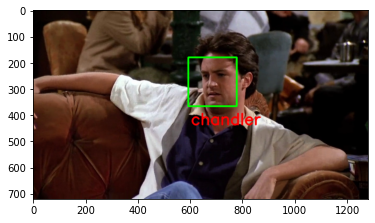

In [28]:
img1_rgb = cv2.imread("./frames/frame2014.jpg")
plt.imshow(img1_rgb)
# img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
face = face_recognition.face_locations(img1_rgb, model="hog")
encod = face_recognition.face_encodings(img1_rgb, face)
print(face)
for encoding in encod:
    match = face_recognition.compare_faces(encoding_list, encoding)
    name ="unk"
    if True in match:
        match_i = [i for (i, b) in enumerate(match) if b]
        count = {}
        for i in match_i:
            name = name_list[i]
            if name not in count.keys():
                count[name] = 0
            count[name] += 1
        name = max(count, key=count.get)
    img_b = cv2.putText(img1_rgb, name, (face[0][3] +10,face[0][2]+70), 0, 2, 255,5)
    img_b = cv2.rectangle(img_b, (face[0][3] , face[0][2] ), (face[0][1] , face[0][0] ), (0, 255, 0), 5)
print(name)
plt.imshow(img_b)